In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.datasets import make_blobs


In [2]:
n_samples = 50  # 50 Training points for both cases.
n_test_points = 30
colours = ('green', 'red')  # colors for case 1 and 2

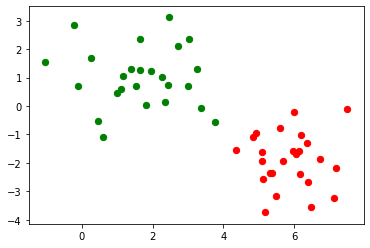

In [3]:
## CASE 1 TRAINING POINTS ARE LINEARLY SEPARABLE.
c1_w_dummy = np.zeros((50,3)) #Needed to format after getting the inputs

c1_samples, labels = make_blobs(n_samples = n_samples, 
                             centers = ([ 1.5, 0.9 ], [6, -2] ), 
                             random_state = 0)

fig, ax = plt.subplots()

for i in range(2):
    ax.scatter(c1_samples[labels == i][:, 0], c1_samples[labels == i][:, 1], 
               c = colours[i], s = 40, label = str(i))
    
i = 0
for point in c1_samples:
    c1_w_dummy[i] = np.insert(point, 0, 1, axis=0)
    i += 1

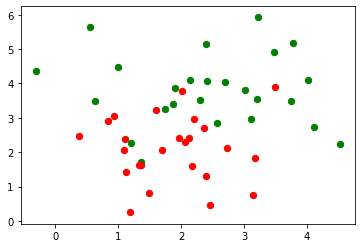

In [4]:
## CASE 2 TRAINING POINTS ARE (NOT) LINEARLY SEPARABLE.

c2_w_dummy = np.zeros((50,3)) #Needed to format after getting the inputs


c2_samples, c2_labels = make_blobs(n_samples = n_samples, 
                             centers = ([2.25, 3.7], [2, 2]),  # We just need to move these points closer together.
                             random_state = 0)

fig, ax = plt.subplots()

for i in range(2):
    ax.scatter(c2_samples[c2_labels == i][:, 0], c2_samples[c2_labels == i][:, 1], 
               c = colours[i], s = 40, label = str(i))
i = 0
for point in c1_samples:
    c2_w_dummy[i] = np.insert(point, 0, 1, axis=0)
    i += 1
    
    # plt.show()

In [5]:
class Perceptron(object):

    def __init__(self, no_of_inputs, passNum=100, learning_rate=0.0001):
        self.passNum = passNum
        self.learning_rate = learning_rate
        self.no_of_inputs = no_of_inputs
        self.weights = None
        self.updated = False
        self.num_iterations = 0
        self.n_updates = 0  #t

    def train(self, training_inputs, labels):
        self.weights = np.zeros(self.no_of_inputs + 1)
        self.weights[0] = 1
        
        for _ in range(self.passNum):
            
            #zip function transposes the rows to columns, to make new rows
            #ex: A= [a,b,c], B=[2,4,1], zip (A, B) = [(a, 2), (b, 4), (c,1)]
            
            for inputs, label in zip(training_inputs, labels): 
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)
                
                
        return self.weights

    def predict(self, inputs):
        self.num_iterations += 1
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
            activation = 1
        else:
            self.n_updates += 1  #t
            activation = 0            
        return activation

In [6]:
print("Creating the instance of our Perceptron.")
ls_perceptron = Perceptron(2) #Perceptron trained on the linearly separable case.
non_ls_perceptron = Perceptron(2) #Perceptron trained on the non-linearly separable case.

Creating the instance of our Perceptron.


In [7]:
# Training for both models. One for linearly separable and another for non-linearly separable.
print("Training the Perceptron on our first training set (linearly separable case) and the second (non-linearly separable case)\n")
############ Linearly separable ###################

weight_vector = ls_perceptron.train(c1_samples, labels)
updates1 = ls_perceptron.n_updates
iter1 = ls_perceptron.num_iterations
print("Our weight vector for the linearly separable case: ", weight_vector, " it took ", updates1, " updates, and ", iter1, " iterations.")

############ NON-Linearly separable ###################

weight_vector2 = non_ls_perceptron.train(c2_samples, c2_labels)
updates2 = non_ls_perceptron.n_updates
iter2 = non_ls_perceptron.num_iterations
print("Our weight vector for the non-linearly separable case: ", weight_vector2, " it took ", updates2, " updates, and ", iter2, " iterations.")

Training the Perceptron on our first training set (linearly separable case) and the second (non-linearly separable case)

Our weight vector for the linearly separable case:  [ 0.7959     -0.17628641 -0.23979283]  it took  459  updates, and  5000  iterations.
Our weight vector for the non-linearly separable case:  [ 0.9304     -0.11445279 -0.2244399 ]  it took  1804  updates, and  5000  iterations.


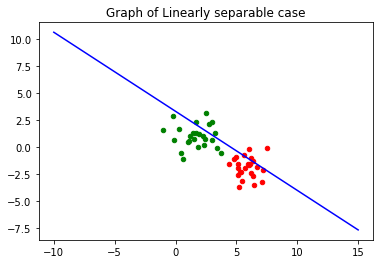

Equation of line found by Perceptron: y =  -0.7351612860961437 *x + 3.3191150697519505


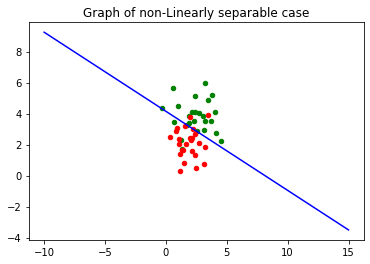

Equation of line found by Perceptron: y =  -0.5099485182345374 *x + 4.145430465646835


In [8]:

########### OUR INTERCEPTS WILL LOOK LIKE THIS #############    
# # x-intercept = (0, -b / w2)
# # y-intercept = (-b / w1, 0)
# x_int = [0, -weight_vector[0] / weight_vector[2]]
# y_int = [-weight_vector[0] / weight_vector[1], 0]


########### PLOTTING PREVIOUS TRAINING POINTS AND GRAPHING THE LINE FOUND BY PERCEPTRON ###########
###########                        FOR THE LINEARLY SEPARABLE CASE.                     ###########
fig, ax = plt.subplots()
for i in range(2):
    ax.scatter(c1_samples[labels == i][:, 0], c1_samples[labels == i][:, 1], 
               c = colours[i], s = 20, label = str(i))

slope1 = -(weight_vector[0] / weight_vector[2]) / (weight_vector[0] / weight_vector[1])

x = np.linspace(-10,15)
y = slope1*x + (-weight_vector[0] / weight_vector[2])

plt.plot(x, y, '-b', label='linearly separable case')
plt.title("Graph of Linearly separable case")
plt.show()
print("Equation of line found by Perceptron: y = ", slope1, "*x +" , (-weight_vector[0] / weight_vector[2] ))



########### PLOTTING PREVIOUS TRAINING POINTS AND GRAPHING THE LINE FOUND BY PERCEPTRON ###########
###########                    FOR THE NON-LINEARLY SEPARABLE CASE.                     ###########
fig, ax = plt.subplots()

for i in range(2):
    ax.scatter(c2_samples[labels == i][:, 0], c2_samples[labels == i][:, 1], 
               c = colours[i], s = 20, label = str(i))
    

slope2 = -(weight_vector2[0] / weight_vector2[2]) / (weight_vector2[0] / weight_vector2[1])

x = np.linspace(-10,15)
y = slope2*x + (-weight_vector2[0] / weight_vector2[2])

plt.plot(x, y, '-b', label='linearly separable case')
plt.title("Graph of non-Linearly separable case")
plt.show()
print("Equation of line found by Perceptron: y = ", slope2, "*x +" , (-weight_vector2[0] / weight_vector2[2] ))

In [9]:
labels

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1])

In [10]:
perceptron = Perceptron(2)
perceptron.train(c1_samples, labels)
arrayPred=[]
for x in c1_samples:

   
    labelPred=perceptron.predict(x)
    arrayPred.append(labelPred)
    
print (arrayPred)

[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [11]:
comparison =labels == arrayPred
equal_arrays = comparison.all()

print(equal_arrays)

False


In [12]:
c2_labels

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1])

In [13]:
non_ls_perceptron.train(c2_samples, c2_labels)
arrayPredNLS=[]
for x in c1_samples:

   
    labelPred=perceptron.predict(x)
    arrayPredNLS.append(labelPred)
    
print (arrayPredNLS)

[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [14]:
comparison =c2_labels == arrayPredNLS
equal_arrays2 = comparison.all()

print(equal_arrays2)

False


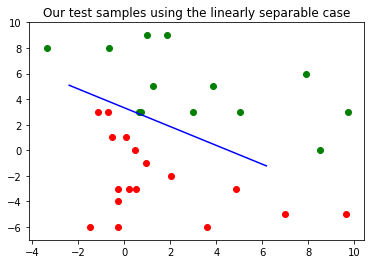

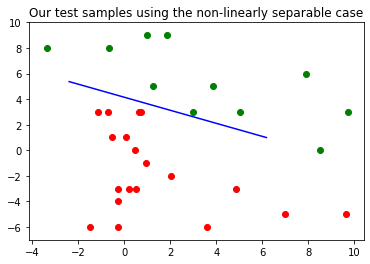

In [15]:
lower, upper = -6, 5

############ USING LINEARLY SEPARABLE LINE ON TEST POINTS #########################
x1 = [random.randrange(start=-5, stop=12) * random.random() for i in range(n_test_points)]
y1 = [random.randrange(start=lower, stop = 10) for x in x1]

for i in range(n_test_points):
    plt.scatter(x1[i], y1[i], c=colours[ls_perceptron.predict([x1[i], y1[i]])])

y = slope1*x + (-weight_vector[0] / weight_vector[2])

plt.plot(x, y, '-b', label='linearly separable case')

plt.title("Our test samples using the linearly separable case")
plt.show()

############ USING NON-LINEARLY SEPARABLE LINE ON TEST POINTS #########################


for i in range(n_test_points):
    plt.scatter(x1[i], y1[i], c=colours[non_ls_perceptron.predict([x1[i], y1[i]])])

y = slope2*x + (-weight_vector2[0] / weight_vector2[2])

plt.plot(x, y, '-b', label='linearly separable case')

plt.title("Our test samples using the non-linearly separable case")
plt.show()

